In [1]:
#Predicting stock price of apple using machine learning algorithm


In [73]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [74]:
#loading the csv file
apple = pd.read_csv('Apple.csv')
apple.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [88]:
# Convert 'Date' column to string type

apple['Date'].dtype
apple.head()
apple = pd.DataFrame(apple)
apple['Date'] = apple['Date'].astype('string')

apple['Date'].replace('-' ,'/' ,inplace = True)
apple.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [13]:
# #converting the csv file to the pandas dataframe
# #to convert the date column of the dataset to the required format
# apple = pd.DataFrame(apple)
# #apple['Date'] = apple['Date'].dt.strftime('%Y/%m/%d')
# apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [14]:
apple.shape

(10409, 7)

In [15]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [16]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


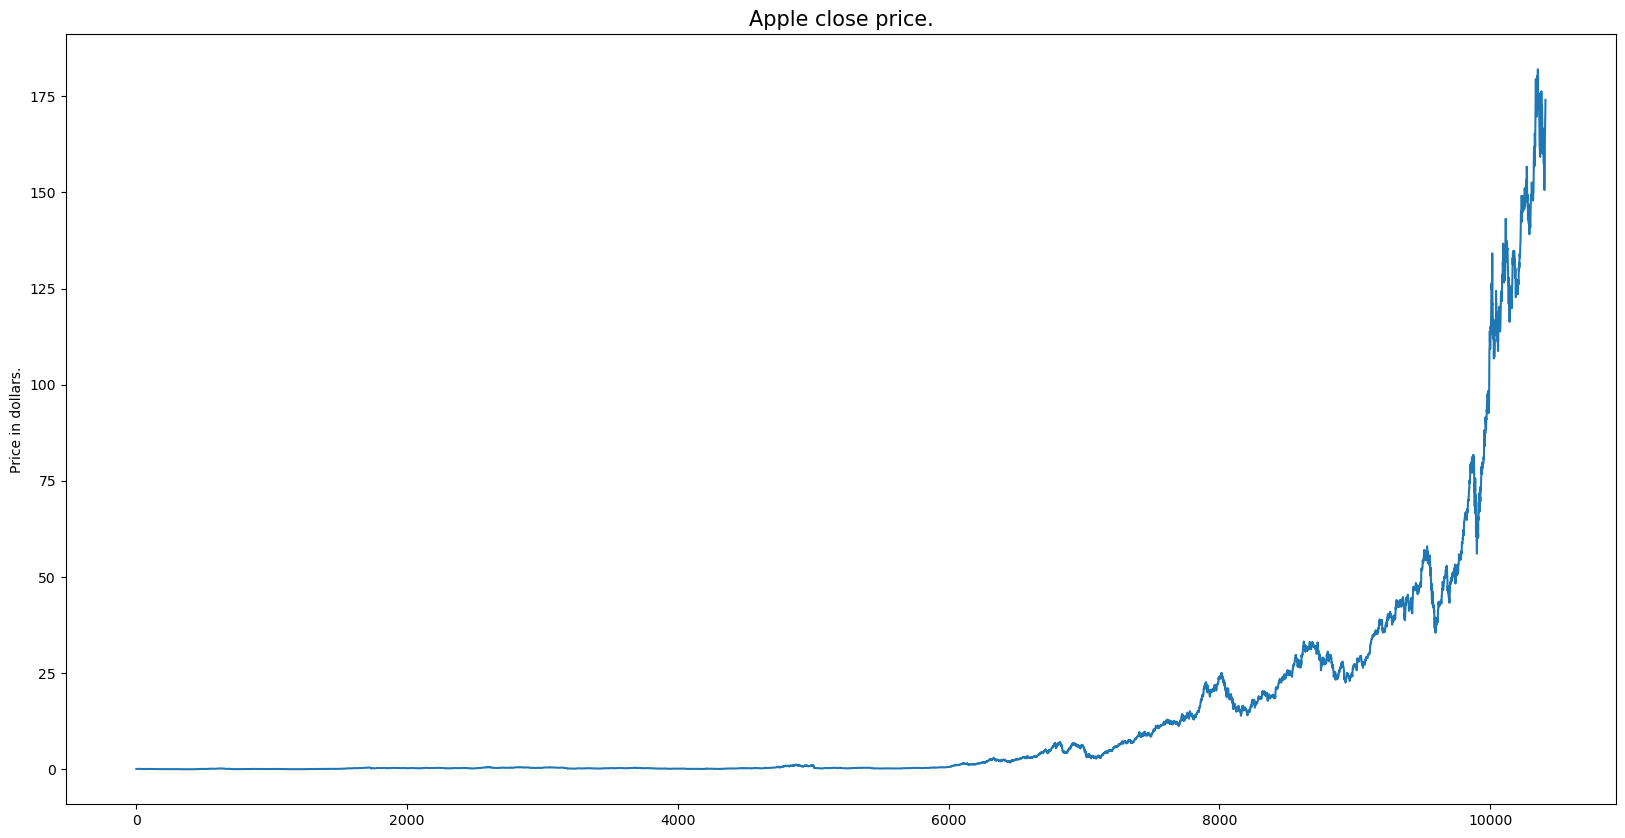

In [18]:
#plotting the graph of the close column 
#It shows upward trend 

plt.figure(figsize = (20,10))
plt.plot(apple['Close'])
plt.title("Apple close price.",fontsize = 15)
plt.ylabel("Price in dollars.")
plt.show()

In [19]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [21]:
#checking if the adj close and close columns have same data 
apple[apple['Close'] == apple['Adj Close']].shape

(34, 7)

In [22]:
apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

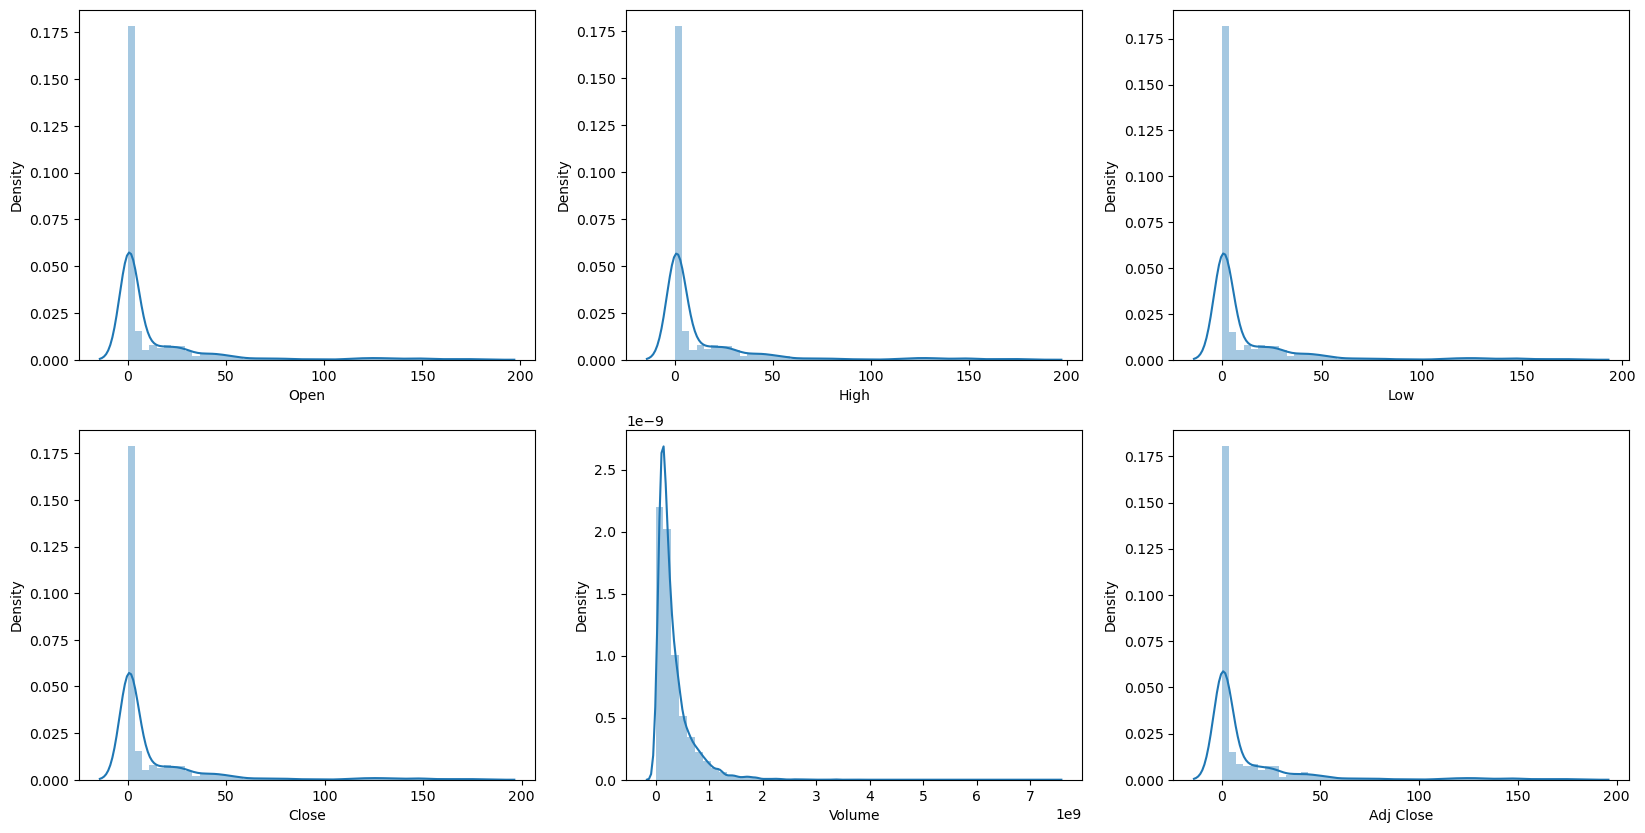

In [23]:
features = ['Open','High','Low','Close','Volume','Adj Close']
plt.subplots(figsize = (20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(apple[col])
plt.show()

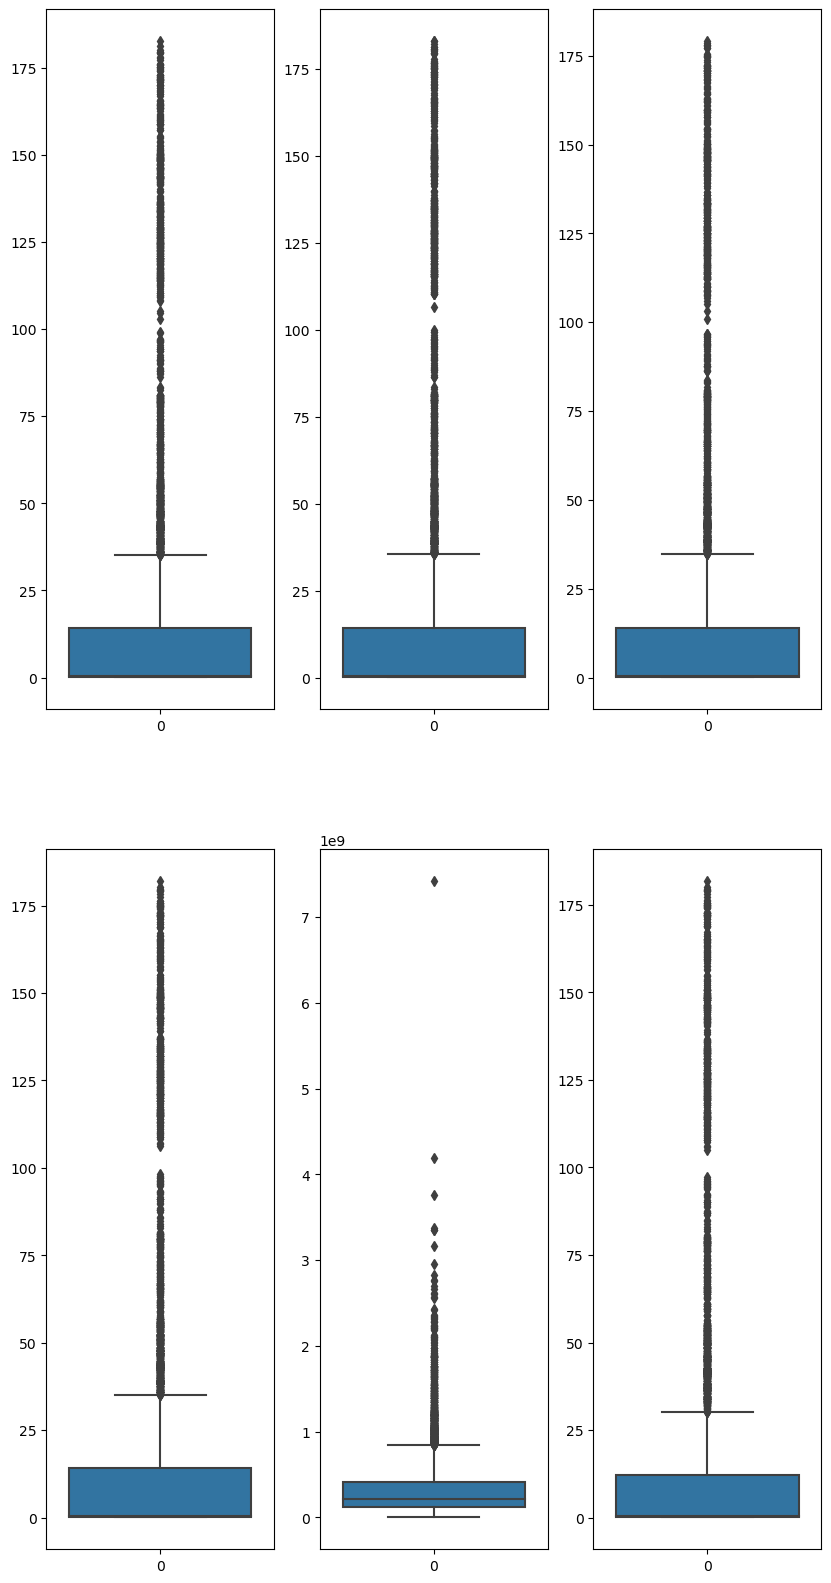

In [49]:
plt.subplots(figsize=(10,20))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(apple[col])
plt.show()

In [56]:
splitted = apple['Date'].str.split('/', expand=True)
 
apple['month'] = splitted[1].astype('int')
apple['year'] = splitted[0].astype('int')
apple['day'] = splitted[2].astype('int')
 
apple.head()
#apple['year'].unique()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,12,12,1980,1
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,15,12,1980,1
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,16,12,1980,1
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,17,12,1980,1
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,18,12,1980,1


In [51]:
apple['is_quarter_end'] = np.where(apple['month']%3==0,1,0)
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,12,12,1980,1
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,15,12,1980,1
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,16,12,1980,1
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,17,12,1980,1
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,18,12,1980,1


In [53]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,12,12,1980,1
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,15,12,1980,1
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,16,12,1980,1
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,17,12,1980,1
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,18,12,1980,1
